## Preparacion del dataset de los estados financieros

In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np


# Gestion de librerias
# ==============================================================================
from importlib import reload


# Matemáticas y estadísticas
# ==============================================================================
import math


# Preparación de datos
# ==============================================================================

from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import LocalOutlierFactor


# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns


# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Funciones externas
# ==============================================================================
from manny_library import multiple_plot

In [2]:
d = pd.read_excel('estados_financieros_cuentas_principales_diciembre_2024.xlsx', sheet_name='Base de datos completa', header=6)

d.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'ACTIVO',
       'EFECTIVO Y EQUIVALENTE AL EFECTIVO', 'INVERSIONES', 'INVENTARIOS',
       'CARTERA DE CRÉDITOS', 'CUENTAS POR COBRAR Y OTRAS',
       'ACTIVOS MATERIALES', 'ACTIVOS NO CORRIENTES MANTENIDOS PARA LA VENTA',
       'OTROS ACTIVOS', 'PASIVOS', 'DEPOSITOS',
       'OBLIGACIONES FINANCIERAS Y OTROS PASIVOS FINANCIEROS',
       'CUENTAS POR PAGAR Y OTRAS', 'IMPUESTO DIFERIDO PASIVO',
       'FONDOS SOCIALES Y MUTUALES', 'OTROS PASIVOS', 'PROVISIONES',
       'PATRIMONIO', 'CAPITAL SOCIAL',
       'APORTES SOCIALES TEMPORALMENTE RESTRINGIDOS', 'RESERVAS',
       'FONDOS  DE DESTINACIÓN ESPECÍFICA', 'SUPERÁVIT',
       'EXCEDENTES Y/O PÉRDIDAS  DEL EJERCICIO',
       'RESULTADOS ACUMULADOS POR ADOPCIÓN POR P

In [3]:
columnas_a_renombrar = {
    'Unnamed: 0': 'CODIGO ENTIDAD',
    'Unnamed: 1': 'ENTIDAD',
    'Unnamed: 2': 'NIT',
    'Unnamed: 3': 'SIGLA',
    'Unnamed: 4': 'TIPO ENTIDAD',
    'Unnamed: 5': 'CIIU',
    'Unnamed: 6': 'ACTIVIDAD ECONOMICA',
    'Unnamed: 7': 'REPRESENTANTE LEGAL',
    'Unnamed: 8': 'DEPARTAMENTO',
    'Unnamed: 9': 'MUNICIPIO',
    'Unnamed: 10': 'DIRECCION',
    'Unnamed: 11': 'TELEFONO',
    'Unnamed: 12': 'EMAIL',
    'Unnamed: 13': 'NIVEL DE SUPERVISION',
    'Unnamed: 14': 'ASOCIADOS',
    'Unnamed: 15': 'EMPLEADOS',
    'Unnamed: 16': 'CATEGORIA'
}

d.rename(columns=columnas_a_renombrar, inplace=True)
d = d.drop(labels=0)


d.head()

,CODIGO ENTIDAD,ENTIDAD,NIT,SIGLA,TIPO ENTIDAD,CIIU,ACTIVIDAD ECONOMICA,REPRESENTANTE LEGAL,DEPARTAMENTO,MUNICIPIO,...,COSTO DE VENTAS Y DE PRESTACION DE SERVICIOS,COMPRAS,DEUDORAS CONTINGENTES,DEUDORAS DE CONTROL,DEUDORAS CONTINGENTES POR CONTRA (CR),DEUDORAS DE CONTROL POR CONTRA (CR),ACREEDORAS CONTINGENTES,ACREEDORAS DE CONTROL,ACREEDORAS POR CONTRA (DB),ACREEDORAS DE CONTROL POR CONTRA (CR)
1,2,COOPERATIVA MULTIACTIVA DE EMPLEADOS DE BANCOS...,891-500-074-3,COOMEBEF,Multiactiva sin seccion de ahorro,6492,Otras actividades,FERNANDO CIFUENTES BARRERA,"BOGOTÁ, D.C.","BOGOTÁ, D.C.",...,0.000000e+00,0.0,32447957.0,2.311660e+03,32447957.0,2.311660e+03,4.165000e+08,0.0,4.165000e+08,0.0
2,3,FONDO DE EMPLEADOS DE LA ASOCIACION BANCARIA,860-013-476-9,FEDEABC,Fondos de empleados,6492,Servicios de ahorro y credito,FEDERICO ORLANDO CASTRO NAVARRO,"BOGOTÁ, D.C.","BOGOTÁ, D.C.",...,4.227412e+08,0.0,15847179.0,0.000000e+00,15847179.0,0.000000e+00,1.988478e+10,0.0,1.987048e+10,14300000.0
3,6,FONDO DE EMPLEADOS DE ORACLE COLOMBIA,800-210-714-3,FEORACLE,Fondos de empleados,6492,Servicios de ahorro y credito,EVELYN CARDENAS BOTERO,"BOGOTÁ, D.C.","BOGOTÁ, D.C.",...,2.520004e+07,0.0,1779198.0,6.438714e+07,1779198.0,5.182562e+10,4.360937e+10,0.0,4.360937e+10,0.0
4,7,COOPERATIVA MULTIACTIVA DE DESARROLLO INTEGRAL...,860-504-146-0,COOHIMAT,Multiactiva sin seccion de ahorro,6492,Servicios de credito,ANGEL ARMANDO GONZALEZ QUIROZ,"BOGOTÁ, D.C.","BOGOTÁ, D.C.",...,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0
5,11,COOPERATIVA MULTIACTIVA SALINAS DE COLOMBIA-CO...,860-029-633-9,COOPSALINAS,Multiactiva sin seccion de ahorro,6492,Servicios de credito,JESSICA TATIANA GOMEZ SANCHEZ,CUNDINAMARCA,ZIPAQUIRÁ,...,0.000000e+00,0.0,44259233.0,1.748142e+08,44259233.0,1.748142e+08,1.530711e+10,0.0,1.530711e+10,0.0


In [4]:
d.columns

Index(['CODIGO ENTIDAD', 'ENTIDAD', 'NIT', 'SIGLA', 'TIPO ENTIDAD', 'CIIU',
       'ACTIVIDAD ECONOMICA', 'REPRESENTANTE LEGAL', 'DEPARTAMENTO',
       'MUNICIPIO', 'DIRECCION', 'TELEFONO', 'EMAIL', 'NIVEL DE SUPERVISION',
       'ASOCIADOS', 'EMPLEADOS', 'CATEGORIA', 'ACTIVO',
       'EFECTIVO Y EQUIVALENTE AL EFECTIVO', 'INVERSIONES', 'INVENTARIOS',
       'CARTERA DE CRÉDITOS', 'CUENTAS POR COBRAR Y OTRAS',
       'ACTIVOS MATERIALES', 'ACTIVOS NO CORRIENTES MANTENIDOS PARA LA VENTA',
       'OTROS ACTIVOS', 'PASIVOS', 'DEPOSITOS',
       'OBLIGACIONES FINANCIERAS Y OTROS PASIVOS FINANCIEROS',
       'CUENTAS POR PAGAR Y OTRAS', 'IMPUESTO DIFERIDO PASIVO',
       'FONDOS SOCIALES Y MUTUALES', 'OTROS PASIVOS', 'PROVISIONES',
       'PATRIMONIO', 'CAPITAL SOCIAL',
       'APORTES SOCIALES TEMPORALMENTE RESTRINGIDOS', 'RESERVAS',
       'FONDOS  DE DESTINACIÓN ESPECÍFICA', 'SUPERÁVIT',
       'EXCEDENTES Y/O PÉRDIDAS  DEL EJERCICIO',
       'RESULTADOS ACUMULADOS POR ADOPCIÓN POR PRIME

## Limpieza de datos

In [5]:
# Borramos columnas que no usaremos

d.drop(['CODIGO ENTIDAD','ENTIDAD', 'NIT', 'SIGLA','CIIU','REPRESENTANTE LEGAL','MUNICIPIO', 'DIRECCION', 'TELEFONO', 'EMAIL'], axis='columns', inplace=True)

In [6]:
#Verificación y eliminación de registros duplicados

d.loc[d.duplicated()]

,TIPO ENTIDAD,ACTIVIDAD ECONOMICA,DEPARTAMENTO,NIVEL DE SUPERVISION,ASOCIADOS,EMPLEADOS,CATEGORIA,ACTIVO,EFECTIVO Y EQUIVALENTE AL EFECTIVO,INVERSIONES,...,COSTO DE VENTAS Y DE PRESTACION DE SERVICIOS,COMPRAS,DEUDORAS CONTINGENTES,DEUDORAS DE CONTROL,DEUDORAS CONTINGENTES POR CONTRA (CR),DEUDORAS DE CONTROL POR CONTRA (CR),ACREEDORAS CONTINGENTES,ACREEDORAS DE CONTROL,ACREEDORAS POR CONTRA (DB),ACREEDORAS DE CONTROL POR CONTRA (CR)


In [7]:
# Excluimos las observaciones donde la variable objetivo sea igual a 0
d = d[d['EXCEDENTES Y/O PÉRDIDAS  DEL EJERCICIO'] != 0]

# Creamos la variable binaria
d['EXCEDENTES Y/O PÉRDIDAS  DEL EJERCICIO'] = np.where(
    d['EXCEDENTES Y/O PÉRDIDAS  DEL EJERCICIO'] > 0, 1, 0
)

In [8]:
d['EXCEDENTES Y/O PÉRDIDAS  DEL EJERCICIO'].value_counts()

EXCEDENTES Y/O PÉRDIDAS  DEL EJERCICIO
1    3103
0     512
Name: count, dtype: int64

## Visualizacion de datos

#### Variables de entrada

In [9]:
tipos_a_cambiar = {
    'ASOCIADOS': 'float64',    
    'EMPLEADOS': 'float64'   
}

d = d.astype(tipos_a_cambiar)
d.dtypes

TIPO ENTIDAD                                             object
ACTIVIDAD ECONOMICA                                      object
DEPARTAMENTO                                             object
NIVEL DE SUPERVISION                                     object
ASOCIADOS                                               float64
EMPLEADOS                                               float64
CATEGORIA                                                object
ACTIVO                                                  float64
EFECTIVO Y EQUIVALENTE AL EFECTIVO                      float64
INVERSIONES                                             float64
INVENTARIOS                                             float64
CARTERA DE CRÉDITOS                                     float64
CUENTAS POR COBRAR Y OTRAS                              float64
ACTIVOS MATERIALES                                      float64
ACTIVOS NO CORRIENTES MANTENIDOS PARA LA VENTA          float64
OTROS ACTIVOS                           

In [10]:
# Lista de variables categóricas
catCols = d.select_dtypes(include = ["object", 'category']).columns.tolist()

d[catCols].head(2)

,TIPO ENTIDAD,ACTIVIDAD ECONOMICA,DEPARTAMENTO,NIVEL DE SUPERVISION,CATEGORIA
1,Multiactiva sin seccion de ahorro,Otras actividades,"BOGOTÁ, D.C.",3,CDACs
2,Fondos de empleados,Servicios de ahorro y credito,"BOGOTÁ, D.C.",2,Fondo de Empleados


In [11]:
# Lista de variables numéricas

numCols = d.select_dtypes(include = ['float64','int32','int64']).columns.tolist()

# Se elimina el elemento bad_credit de la lista de variables Categóricas
numCols.remove('EXCEDENTES Y/O PÉRDIDAS  DEL EJERCICIO')

d[numCols].head(2)

,ASOCIADOS,EMPLEADOS,ACTIVO,EFECTIVO Y EQUIVALENTE AL EFECTIVO,INVERSIONES,INVENTARIOS,CARTERA DE CRÉDITOS,CUENTAS POR COBRAR Y OTRAS,ACTIVOS MATERIALES,ACTIVOS NO CORRIENTES MANTENIDOS PARA LA VENTA,...,COSTO DE VENTAS Y DE PRESTACION DE SERVICIOS,COMPRAS,DEUDORAS CONTINGENTES,DEUDORAS DE CONTROL,DEUDORAS CONTINGENTES POR CONTRA (CR),DEUDORAS DE CONTROL POR CONTRA (CR),ACREEDORAS CONTINGENTES,ACREEDORAS DE CONTROL,ACREEDORAS POR CONTRA (DB),ACREEDORAS DE CONTROL POR CONTRA (CR)
1,437.0,4.0,2.574097e+09,6.007688e+08,0.000000e+00,0.0,1.520753e+09,14295179.0,438279168.0,0.0,...,0.000000e+00,0.0,32447957.0,2311.66,32447957.0,2311.66,4.165000e+08,0.0,4.165000e+08,0.0
2,451.0,2.0,9.871090e+09,1.378691e+09,1.697690e+09,0.0,6.789256e+09,4606411.0,766661.0,0.0,...,4.227412e+08,0.0,15847179.0,0.00,15847179.0,0.00,1.988478e+10,0.0,1.987048e+10,14300000.0


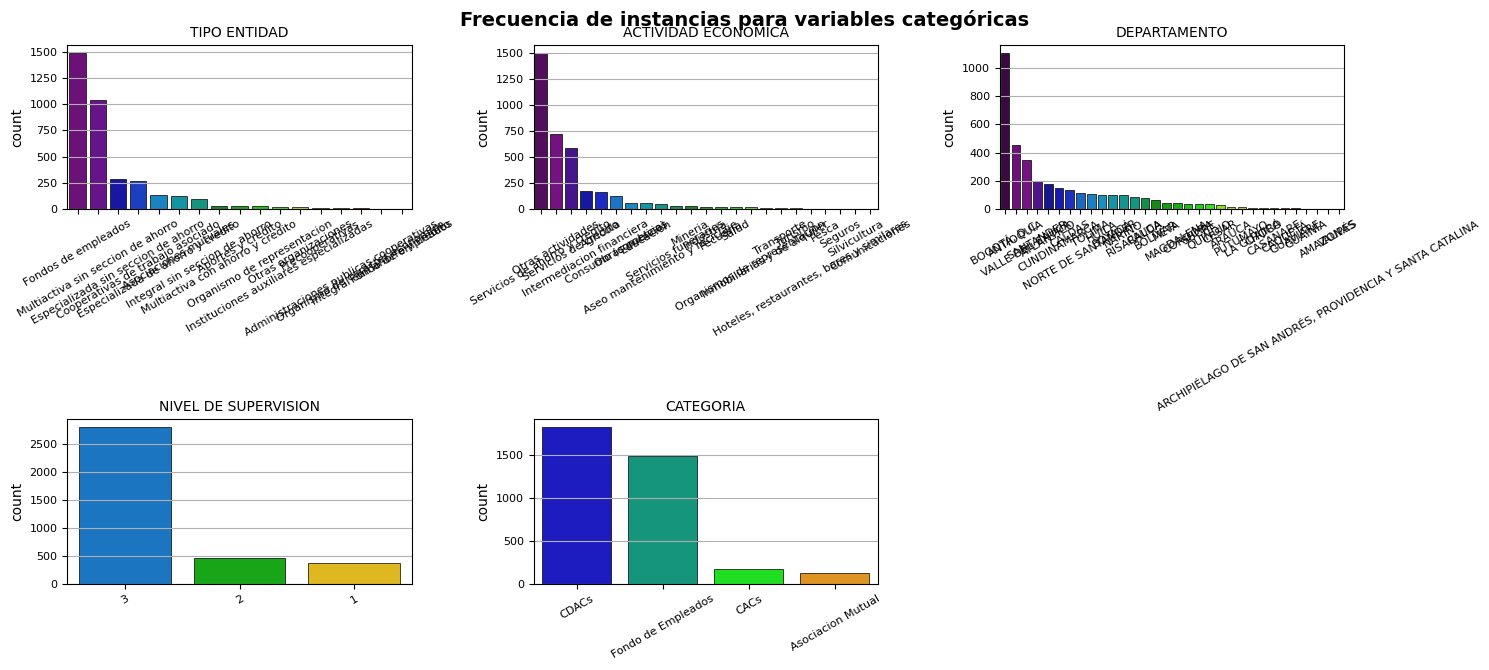

In [12]:
# Visualización de frecuencia de instancias para variables categóricas
multiple_plot(3, d , catCols, None, 'countplot', 'Frecuencia de instancias para variables categóricas',30)

In [13]:
# Distribución de cada variable categórica en el conjunto de datos

for col in catCols:
    print("="*5 + f" {col} " + "="*20)
    print(d[col].value_counts())
    print()

===== TIPO ENTIDAD ====================
TIPO ENTIDAD
Fondos de empleados                        1491
Multiactiva sin seccion de ahorro          1037
Especializada sin seccion de ahorro         283
Cooperativas de trabajo asociado            270
Especializada de ahorro y credito           138
Asociaciones mutuales                       128
Integral sin seccion de ahorro               98
Multiactiva con ahorro y credito             32
Aportes y credito                            28
Organismo de representacion                  27
Instituciones auxiliares especializadas      24
Otras organizaciones                         20
Precooperativas                              13
Administraciones publicas cooperativas       12
Organismo de caracter economico              10
Integral con ahorro y credito                 2
Fondo de empleados                            2
Name: count, dtype: int64

===== ACTIVIDAD ECONOMICA ====================
ACTIVIDAD ECONOMICA
Servicios de ahorro y credito        

In [14]:
# Matriz de correlacion de mis variables numericas para identificar multicolinealidad

d[numCols].corr()

,ASOCIADOS,EMPLEADOS,ACTIVO,EFECTIVO Y EQUIVALENTE AL EFECTIVO,INVERSIONES,INVENTARIOS,CARTERA DE CRÉDITOS,CUENTAS POR COBRAR Y OTRAS,ACTIVOS MATERIALES,ACTIVOS NO CORRIENTES MANTENIDOS PARA LA VENTA,...,COSTO DE VENTAS Y DE PRESTACION DE SERVICIOS,COMPRAS,DEUDORAS CONTINGENTES,DEUDORAS DE CONTROL,DEUDORAS CONTINGENTES POR CONTRA (CR),DEUDORAS DE CONTROL POR CONTRA (CR),ACREEDORAS CONTINGENTES,ACREEDORAS DE CONTROL,ACREEDORAS POR CONTRA (DB),ACREEDORAS DE CONTROL POR CONTRA (CR)
ASOCIADOS,1.000000,0.174257,0.562755,0.550805,0.310010,0.022543,0.650811,0.128721,0.209465,0.112685,...,0.045837,-0.006320,0.622173,0.355830,0.622173,0.357575,0.351119,0.317247,0.555077,0.041084
EMPLEADOS,0.174257,1.000000,0.373387,0.212009,0.156879,0.602058,0.182687,0.481881,0.550366,0.022246,...,0.567287,-0.002878,0.114723,0.154139,0.114723,0.154123,0.143819,0.050452,0.211310,0.022976
ACTIVO,0.562755,0.373387,1.000000,0.731086,0.805001,0.302670,0.634315,0.513843,0.656980,0.060834,...,0.312968,-0.004414,0.377149,0.817616,0.377149,0.818085,0.528015,0.175620,0.514116,0.283168
EFECTIVO Y EQUIVALENTE AL EFECTIVO,0.550805,0.212009,0.731086,1.000000,0.335734,0.108385,0.852048,0.235905,0.280445,0.076572,...,0.131002,-0.004214,0.458292,0.380245,0.458292,0.382748,0.854294,0.104575,0.531932,0.673337
INVERSIONES,0.310010,0.156879,0.805001,0.335734,1.000000,0.035064,0.158669,0.295382,0.450591,0.000154,...,0.043272,-0.001434,0.070979,0.989005,0.070979,0.987555,0.127618,0.015927,0.208229,0.002242
INVENTARIOS,0.022543,0.602058,0.302670,0.108385,0.035064,1.000000,0.021279,0.802572,0.707792,-0.001431,...,0.918091,0.009487,0.018120,0.004476,0.018120,0.004391,0.013087,0.003419,0.022839,-0.000767
CARTERA DE CRÉDITOS,0.650811,0.182687,0.634315,0.852048,0.158669,0.021279,1.000000,0.091983,0.152603,0.115937,...,0.038012,-0.007884,0.635343,0.211847,0.635343,0.214652,0.816927,0.328121,0.713297,0.505213
CUENTAS POR COBRAR Y OTRAS,0.128721,0.481881,0.513843,0.235905,0.295382,0.802572,0.091983,1.000000,0.801226,0.014521,...,0.812621,0.000434,0.058302,0.262287,0.058302,0.261820,0.065639,0.015429,0.096290,0.009972
ACTIVOS MATERIALES,0.209465,0.550366,0.656980,0.280445,0.450591,0.707792,0.152603,0.801226,1.000000,0.019589,...,0.720237,-0.003185,0.093377,0.434730,0.093377,0.434499,0.112455,0.080499,0.156751,0.027542
ACTIVOS NO CORRIENTES MANTENIDOS PARA LA VENTA,0.112685,0.022246,0.060834,0.076572,0.000154,-0.001431,0.115937,0.014521,0.019589,1.000000,...,0.003843,-0.001224,0.141792,0.010668,0.141792,0.010615,0.051074,-0.000831,0.083772,0.000006


#### Variable de salida

In [15]:
d['EXCEDENTES Y/O PÉRDIDAS  DEL EJERCICIO'].value_counts()

EXCEDENTES Y/O PÉRDIDAS  DEL EJERCICIO
1    3103
0     512
Name: count, dtype: int64

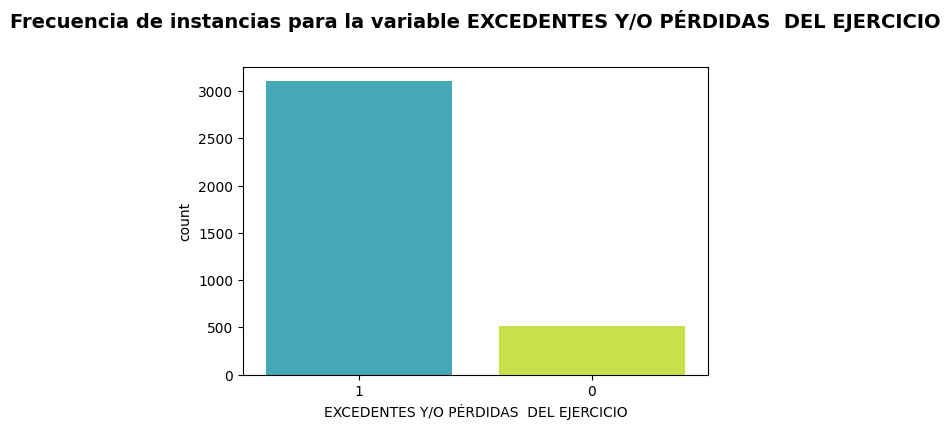

In [16]:
multiple_plot(1, d , None, 'EXCEDENTES Y/O PÉRDIDAS  DEL EJERCICIO', 'countplot', 'Frecuencia de instancias para la variable EXCEDENTES Y/O PÉRDIDAS  DEL EJERCICIO',0)

## Preparacion de datos

#### Imputaciones

In [17]:
# Identificación de valores nulos para las variables numéricas
for col in d[numCols]:
    print (col, np.sum(pd.isnull(d[col])))

ASOCIADOS 117
EMPLEADOS 247
ACTIVO 0
EFECTIVO Y EQUIVALENTE AL EFECTIVO 0
INVERSIONES 0
INVENTARIOS 0
CARTERA DE CRÉDITOS 0
CUENTAS POR COBRAR Y OTRAS 0
ACTIVOS MATERIALES 0
ACTIVOS NO CORRIENTES MANTENIDOS PARA LA VENTA 0
OTROS ACTIVOS 0
PASIVOS 0
DEPOSITOS 0
OBLIGACIONES FINANCIERAS Y OTROS PASIVOS FINANCIEROS 0
CUENTAS POR PAGAR Y OTRAS 0
IMPUESTO DIFERIDO PASIVO 0
FONDOS SOCIALES Y MUTUALES 0
OTROS PASIVOS 0
PROVISIONES 0
PATRIMONIO 0
CAPITAL SOCIAL 0
APORTES SOCIALES TEMPORALMENTE RESTRINGIDOS 0
RESERVAS 0
FONDOS  DE DESTINACIÓN ESPECÍFICA 0
SUPERÁVIT 0
RESULTADOS ACUMULADOS POR ADOPCIÓN POR PRIMERA VEZ 0
INGRESOS 0
INGRESOS POR VENTA DE BIENES Y SERVICIOS 0
OTROS INGRESOS 0
GASTOS 0
GASTOS DE ADMINISTRACION 0
OTROS GASTOS 0
EXCEDENTES Y PERDIDAS DEL EJERCICIO 0
GASTOS DE VENTAS 0
COSTO DE VENTAS 0
COSTO DE VENTAS Y DE PRESTACION DE SERVICIOS 0
COMPRAS 0
DEUDORAS CONTINGENTES 0
DEUDORAS DE CONTROL 0
DEUDORAS CONTINGENTES POR CONTRA (CR) 0
DEUDORAS DE CONTROL POR CONTRA (CR) 0
ACRE

In [18]:
d['ASOCIADOS'].fillna(d['ASOCIADOS'].median(), inplace = True)
d['EMPLEADOS'].fillna(d['EMPLEADOS'].median(), inplace = True)
d.isnull().sum().sum() # Cero datos nulos

np.int64(0)

In [19]:
# Identificación de valores nulos para las variables categóricas
for col in d[catCols]:
    print (col, np.sum(pd.isnull(d[col])))

TIPO ENTIDAD 0
ACTIVIDAD ECONOMICA 0
DEPARTAMENTO 0
NIVEL DE SUPERVISION 0
CATEGORIA 0


#### Transformaciones

In [20]:
# Distribución de cada variable categórica en el conjunto de datos

for col in catCols:
    print("="*5 + f" {col} " + "="*20)
    print(d[col].value_counts())
    print()

===== TIPO ENTIDAD ====================
TIPO ENTIDAD
Fondos de empleados                        1491
Multiactiva sin seccion de ahorro          1037
Especializada sin seccion de ahorro         283
Cooperativas de trabajo asociado            270
Especializada de ahorro y credito           138
Asociaciones mutuales                       128
Integral sin seccion de ahorro               98
Multiactiva con ahorro y credito             32
Aportes y credito                            28
Organismo de representacion                  27
Instituciones auxiliares especializadas      24
Otras organizaciones                         20
Precooperativas                              13
Administraciones publicas cooperativas       12
Organismo de caracter economico              10
Integral con ahorro y credito                 2
Fondo de empleados                            2
Name: count, dtype: int64

===== ACTIVIDAD ECONOMICA ====================
ACTIVIDAD ECONOMICA
Servicios de ahorro y credito        

In [21]:
# Diccionario con los reemplazos a realizar
reemplazos_te = {"Fondo de empleados": "Fondos de empleados"}

# Todos los que tengan menos de 10 observaciones fueron asignados a "Otras actividades"

reemplazos_ae = {"Vigilancia y seguridad": "Otras actividades"
              ,"Inmobiliarias y de alquiler": "Otras actividades"
              , "Transporte": "Otras actividades"
              , "Pesca": "Otras actividades"
              , "Comunicaciones": "Otras actividades"
              , "Turismo": "Otras actividades"
              , "Hoteles, restaurantes, bares y similares": "Otras actividades"
              , "Silvicultura": "Otras actividades"
              , "Seguros": "Otras actividades"}


# Se reemplazan los valores de acuerdo con el diccionario creado anteriormente
d['ACTIVIDAD ECONOMICA'] = d['ACTIVIDAD ECONOMICA'].map(reemplazos_ae).fillna(d['ACTIVIDAD ECONOMICA'])
d['TIPO ENTIDAD'] = d['TIPO ENTIDAD'].map(reemplazos_te).fillna(d['TIPO ENTIDAD'])

# Visualización de las nuevos valores agrupados para las categorias 'ACTIVIDAD ECONOMICA' y 'TIPO ENTIDAD'
print(d['TIPO ENTIDAD'].value_counts().sort_values(ascending=False))
print(d['ACTIVIDAD ECONOMICA'].value_counts().sort_values(ascending=False))

TIPO ENTIDAD
Fondos de empleados                        1493
Multiactiva sin seccion de ahorro          1037
Especializada sin seccion de ahorro         283
Cooperativas de trabajo asociado            270
Especializada de ahorro y credito           138
Asociaciones mutuales                       128
Integral sin seccion de ahorro               98
Multiactiva con ahorro y credito             32
Aportes y credito                            28
Organismo de representacion                  27
Instituciones auxiliares especializadas      24
Otras organizaciones                         20
Precooperativas                              13
Administraciones publicas cooperativas       12
Organismo de caracter economico              10
Integral con ahorro y credito                 2
Name: count, dtype: int64
ACTIVIDAD ECONOMICA
Servicios de ahorro y credito     1498
Otras actividades                  758
Servicios de credito               590
Intermediacion financiera          169
Agricola         

#### Valores atipicos para las variables de entrada

In [22]:
# Utilización de LocalOutlierFactor con 13 vecinos para identificar valores atípicos en las variables de entrada


# Crear un objeto LocalOutlierFactor con n_neighbors=13
lof = LocalOutlierFactor(n_neighbors=13, contamination=0.1)

# Identificar los valores atípicos por medio de lof
y_pred = lof.fit_predict(d[numCols])

# Identificar los índices de los valores atípicos
outliers = y_pred == -1

print('Indices de valores atípicos: ', d[outliers].index.tolist())

Indices de valores atípicos:  [19, 47, 56, 64, 72, 79, 115, 117, 128, 146, 147, 152, 159, 197, 198, 229, 231, 236, 263, 276, 303, 329, 337, 347, 359, 390, 395, 398, 410, 412, 413, 425, 433, 435, 437, 439, 444, 467, 477, 496, 540, 543, 544, 551, 552, 556, 568, 579, 586, 591, 603, 618, 640, 644, 649, 650, 653, 654, 655, 657, 660, 662, 672, 682, 712, 717, 749, 755, 759, 763, 790, 798, 799, 814, 823, 844, 872, 892, 899, 908, 917, 966, 967, 977, 981, 985, 991, 995, 996, 1007, 1008, 1049, 1070, 1097, 1103, 1105, 1109, 1114, 1115, 1116, 1117, 1119, 1131, 1143, 1145, 1161, 1165, 1170, 1188, 1190, 1193, 1198, 1223, 1229, 1230, 1236, 1243, 1274, 1323, 1333, 1336, 1341, 1344, 1365, 1407, 1443, 1445, 1459, 1463, 1466, 1485, 1494, 1499, 1505, 1513, 1523, 1539, 1547, 1553, 1556, 1571, 1577, 1586, 1600, 1638, 1668, 1688, 1689, 1693, 1694, 1702, 1703, 1704, 1715, 1717, 1720, 1722, 1744, 1746, 1750, 1752, 1769, 1770, 1774, 1797, 1849, 1858, 1869, 1884, 1897, 1922, 1926, 1928, 1940, 1941, 1946, 1948, 19

In [23]:
# Eliminar los valores atípicos del dataframe original
d = d.loc[~outliers]

In [24]:
d.shape

(3253, 51)

#### Balanceo variable de salida

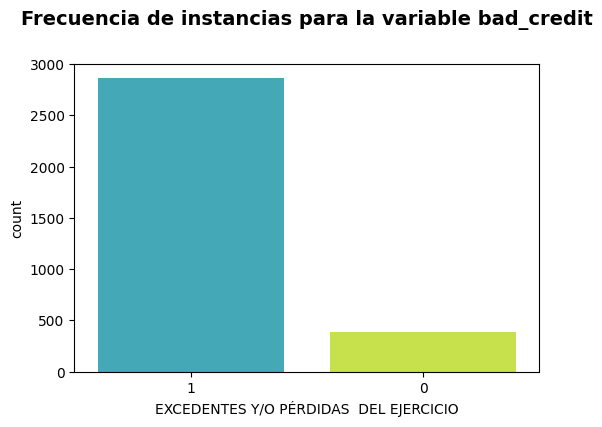

In [25]:
multiple_plot(1, d , None, 'EXCEDENTES Y/O PÉRDIDAS  DEL EJERCICIO', 'countplot', 'Frecuencia de instancias para la variable bad_credit',0)

In [26]:
d['EXCEDENTES Y/O PÉRDIDAS  DEL EJERCICIO'].value_counts()

EXCEDENTES Y/O PÉRDIDAS  DEL EJERCICIO
1    2861
0     392
Name: count, dtype: int64

In [27]:
# Se crea un objeto RandomOverSampler que permite crear copias aleatorias de las muestras de la clase
# minoritaria para igualar el número de muestras entre las diferentes clases.
oversampler = RandomOverSampler()

# Se realiza el sobremuestreo para las variables de entrada y salida
X_resampled, y_resampled = oversampler.fit_resample(d.drop('EXCEDENTES Y/O PÉRDIDAS  DEL EJERCICIO', axis=1), d['EXCEDENTES Y/O PÉRDIDAS  DEL EJERCICIO'])

# Se crean dos dataframes con las variables de entrada y otro con la variable de salida a partir del proceso anterior
df1 = pd.DataFrame(X_resampled, columns = d.columns.drop('EXCEDENTES Y/O PÉRDIDAS  DEL EJERCICIO'))
df2 = pd.DataFrame(y_resampled)

# Se concatenan los dataframes horizontalmente
df_balanced = pd.concat([df1, df2], axis=1)

df = df_balanced

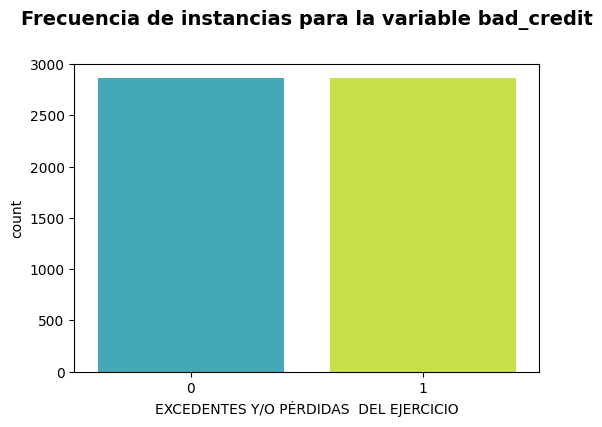

In [28]:
multiple_plot(1, df , None, 'EXCEDENTES Y/O PÉRDIDAS  DEL EJERCICIO', 'countplot', 'Frecuencia de instancias para la variable bad_credit',0)

In [29]:
df['EXCEDENTES Y/O PÉRDIDAS  DEL EJERCICIO'].value_counts()

EXCEDENTES Y/O PÉRDIDAS  DEL EJERCICIO
0    2861
1    2861
Name: count, dtype: int64

In [30]:
df.head()

,TIPO ENTIDAD,ACTIVIDAD ECONOMICA,DEPARTAMENTO,NIVEL DE SUPERVISION,ASOCIADOS,EMPLEADOS,CATEGORIA,ACTIVO,EFECTIVO Y EQUIVALENTE AL EFECTIVO,INVERSIONES,...,COMPRAS,DEUDORAS CONTINGENTES,DEUDORAS DE CONTROL,DEUDORAS CONTINGENTES POR CONTRA (CR),DEUDORAS DE CONTROL POR CONTRA (CR),ACREEDORAS CONTINGENTES,ACREEDORAS DE CONTROL,ACREEDORAS POR CONTRA (DB),ACREEDORAS DE CONTROL POR CONTRA (CR),EXCEDENTES Y/O PÉRDIDAS DEL EJERCICIO
0,Multiactiva sin seccion de ahorro,Otras actividades,"BOGOTÁ, D.C.",3,437.0,4.0,CDACs,2.574097e+09,6.007688e+08,0.000000e+00,...,0.0,32447957.0,2.311660e+03,32447957.0,2.311660e+03,4.165000e+08,0.0,4.165000e+08,0.0,0
1,Fondos de empleados,Servicios de ahorro y credito,"BOGOTÁ, D.C.",2,451.0,2.0,Fondo de Empleados,9.871090e+09,1.378691e+09,1.697690e+09,...,0.0,15847179.0,0.000000e+00,15847179.0,0.000000e+00,1.988478e+10,0.0,1.987048e+10,14300000.0,1
2,Fondos de empleados,Servicios de ahorro y credito,"BOGOTÁ, D.C.",1,996.0,6.0,Fondo de Empleados,7.831922e+10,4.584834e+09,2.303277e+10,...,0.0,1779198.0,6.438714e+07,1779198.0,5.182562e+10,4.360937e+10,0.0,4.360937e+10,0.0,1
3,Multiactiva sin seccion de ahorro,Servicios de credito,"BOGOTÁ, D.C.",3,640.0,2.0,CDACs,2.397233e+09,3.387880e+08,7.046790e+07,...,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0
4,Multiactiva sin seccion de ahorro,Servicios de credito,CUNDINAMARCA,2,1022.0,7.0,CDACs,8.703593e+09,8.282784e+08,1.081391e+08,...,0.0,44259233.0,1.748142e+08,44259233.0,1.748142e+08,1.530711e+10,0.0,1.530711e+10,0.0,1


In [34]:
df.columns

Index(['TIPO ENTIDAD', 'ACTIVIDAD ECONOMICA', 'DEPARTAMENTO',
       'NIVEL DE SUPERVISION', 'ASOCIADOS', 'EMPLEADOS', 'CATEGORIA', 'ACTIVO',
       'EFECTIVO Y EQUIVALENTE AL EFECTIVO', 'INVERSIONES', 'INVENTARIOS',
       'CARTERA DE CRÉDITOS', 'CUENTAS POR COBRAR Y OTRAS',
       'ACTIVOS MATERIALES', 'ACTIVOS NO CORRIENTES MANTENIDOS PARA LA VENTA',
       'OTROS ACTIVOS', 'PASIVOS', 'DEPOSITOS',
       'OBLIGACIONES FINANCIERAS Y OTROS PASIVOS FINANCIEROS',
       'CUENTAS POR PAGAR Y OTRAS', 'IMPUESTO DIFERIDO PASIVO',
       'FONDOS SOCIALES Y MUTUALES', 'OTROS PASIVOS', 'PROVISIONES',
       'PATRIMONIO', 'CAPITAL SOCIAL',
       'APORTES SOCIALES TEMPORALMENTE RESTRINGIDOS', 'RESERVAS',
       'FONDOS  DE DESTINACIÓN ESPECÍFICA', 'SUPERÁVIT',
       'RESULTADOS ACUMULADOS POR ADOPCIÓN POR PRIMERA VEZ', 'INGRESOS',
       'INGRESOS POR VENTA DE BIENES Y SERVICIOS', 'OTROS INGRESOS', 'GASTOS',
       'GASTOS DE ADMINISTRACION', 'OTROS GASTOS',
       'EXCEDENTES Y PERDIDAS DEL E

In [37]:
df = df.drop(columns=['EXCEDENTES Y PERDIDAS DEL EJERCICIO'], axis=1)

In [38]:
df.to_csv('df.csv', index=False)